## The point spread function

The point spread functions blures the data in spatial direction and is an observational artefact. So far we have implemented a gaussian kernel. With that kernel the mock-observations can be convolved to mimic real observations. It is important that the sum of the kernel is 1.

In [1]:
#NBVAL_SKIP
from rubix.telescope.psf.kernels import gaussian_kernel_2d

kernel = gaussian_kernel_2d(20,20,3.5)
print(kernel.shape)
print(kernel.sum())

(20, 20)
1.0


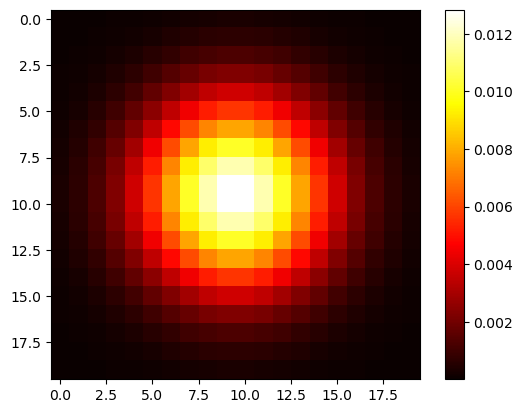

In [2]:
#NBVAL_SKIP
import matplotlib.pyplot as plt
plt.imshow(kernel, cmap='hot')
plt.colorbar()

Here an example for the PSF convolution, we have an artificial datacube of shape (50,50,300), which contains random numbers in the spatial dimension. Each layer in the wavelength dimension is convolved with the kernel. We plot one spaxel [10,10] along the wavelength range for the original random data and the psf smoothed random data.

(50, 50, 300)


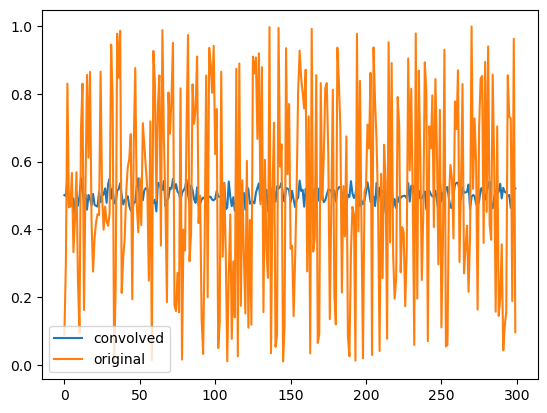

In [3]:
#NBVAL_SKIP
# Get an example Datacube
from rubix.telescope.psf.psf import apply_psf
import numpy as np
import jax.numpy as jnp
datacube = np.ones((50,50,300))
# create random data
for i in range(300):
    datacube[:,:,i] = np.random.rand(50,50)

datacube = jnp.array(datacube)

convolved_datacube = apply_psf(datacube, kernel)
print(convolved_datacube.shape)

plt.plot(convolved_datacube[10,10,:], label='convolved')
plt.plot(datacube[10,10,:], label='original')
plt.legend()